In [2]:
import sys
print(sys.executable)

!pip install --upgrade pip


c:\Users\Haneesh.B\Downloads\Minor_project\venv\Scripts\python.exe


In [3]:
!pip install numpy matplotlib earthaccess jupyter


  Using cached numpy-2.3.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached earthaccess-0.15.1-py3-none-any.whl.metadata (9.6 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached fsspec-2025.12.0-py3-none-any.whl.metadata (10 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached multimethod-2.0.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached pqdm-0.2.0-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached python_cmr-0.13.0-py3-none-any.whl.metadata (10 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached s3fs-2025.12.0-p

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import earthaccess

print("All packages installed correctly ✅")


All packages installed correctly ✅


In [5]:
earthaccess.login()


In [6]:
results = earthaccess.search_data(
    short_name="MOD09GA",
    temporal=("2023-01-01", "2023-01-02"),
    bounding_box=(77, 12, 79, 14)
)

len(results)


2

In [7]:
files = earthaccess.download(results, "./data")
files


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

[WindowsPath('data/MOD09GA.A2023001.h25v07.061.2023003041849.hdf'),
 WindowsPath('data/MOD09GA.A2023002.h25v07.061.2023004084846.hdf')]

In [1]:
!pip install rasterio


  Using cached rasterio-1.4.4-cp312-cp312-win_amd64.whl.metadata (9.6 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached rasterio-1.4.4-cp312-cp312-win_amd64.whl (25.7 MB)
Using cached click-8.3.1-py3-none-any.whl (108 kB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl (11 kB)

   ---------------------------------------- 0/5 [click]
   ---------------------------------------- 0/5 [click]
   ---------------------------------------- 0/5 [click]
   ---------------------------------------- 0/5 [click]
   -------- ------------------------------- 1/5 [affine]
   -------- ------------------------------- 1/5 [affine]
   ------------------------ ---------------

In [2]:
import rasterio
print("rasterio is working ✅")


rasterio is working ✅


In [3]:
red_path = "../data/geotiff/sur_refl_b01.tif"

with rasterio.open(red_path) as src:
    red = src.read(1)
    profile = src.profile

red.shape, profile


RasterioIOError: ../data/geotiff/sur_refl_b01.tif: No such file or directory

In [6]:
import os
print(os.getcwd())


c:\Users\Haneesh.B\Downloads\Minor_project\notebooks


In [7]:
import os

print(os.listdir(".."))


['data', 'notebooks', 'venv']


In [8]:
import os

print(os.listdir("../data/geotiff"))


['MOD09GA.061_sur_refl_b01_1_doy2023001000000_aid0001.tif', 'MOD09GA.061_sur_refl_b02_1_doy2023001000000_aid0001.tif']


In [10]:
import rasterio

red_path = "../data/geotiff/sur_refl_b01.tif"
nir_path = "../data/geotiff/sur_refl_b02.tif"

with rasterio.open(red_path) as src:
    red = src.read(1)

with rasterio.open(nir_path) as src:
    nir = src.read(1)

red.shape, nir.shape


((1297, 1258), (1297, 1258))

In [11]:
import numpy as np

red = red.astype(np.float32)
nir = nir.astype(np.float32)

ndvi = (nir - red) / (nir + red)
ndvi


C:\Users\Haneesh.B\AppData\Local\Temp\ipykernel_21408\2689247017.py:6: RuntimeWarning: divide by zero encountered in divide
  ndvi = (nir - red) / (nir + red)


array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]],
      shape=(1297, 1258), dtype=float32)

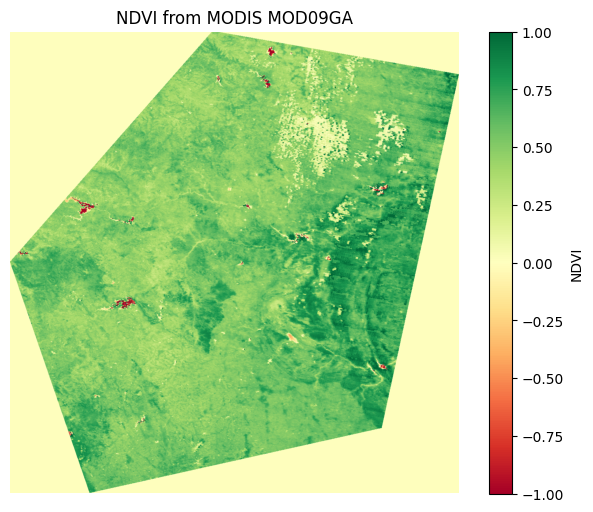

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title("NDVI from MODIS MOD09GA")
plt.axis("off")
plt.show()


In [13]:
with rasterio.open(red_path) as src:
    profile = src.profile

profile.update(dtype=rasterio.float32, count=1)

output_path = "../data/geotiff/ndvi_2023001.tif"

with rasterio.open(output_path, "w", **profile) as dst:
    dst.write(ndvi, 1)
